# –ß—Ç–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pymorphy3
from transliterate import translit, get_available_language_codes
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [387]:
filename = 'geo-reviews-dataset-2023.tskv'

all_records = []

with open(filename, 'r', encoding='utf-8') as f:
    for line in f:
        if not line.strip():
            continue
            
        record_dict = {}
        
        pairs = line.strip().split('\t')
        
        for pair in pairs:
            try:
                key, value = pair.split('=', 1)
                record_dict[key] = value
            except ValueError:
                pass
                
        all_records.append(record_dict)

df = pd.DataFrame(all_records)

df.head()


address             name_ru  \
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   

  rating                                            rubrics  \
0     3.                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   
1     5.  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2     1.                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3     4.        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4     5.  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   

                                                text  
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...  
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...  
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...  
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...  
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...

# EDA

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–æ—Å—Ç–∞–≤ –¥–∞–Ω–Ω—ã—Ö

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   address  500000 non-null  object
 1   name_ru  499030 non-null  object
 2   rating   500000 non-null  object
 3   rubrics  500000 non-null  object
 4   text     500000 non-null  object
dtypes: object(5)
memory usage: 19.1+ MB


## –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–∏–ø–æ–≤

In [389]:
df['rating'] = pd.to_numeric(df['rating'])
df['rating'].value_counts(dropna=False)

rating
5.0    390515
4.0     41160
1.0     34351
3.0     21686
2.0     12088
0.0       200
Name: count, dtype: int64

In [390]:
df['rubrics_list'] = df['rubrics'].str.split(';')
df.head()

address             name_ru  \
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   

   rating                                            rubrics  \
0     3.0                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   
1     5.0  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2     1.0                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3     4.0        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4     5.0  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   

                                                text  \
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...   
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...   
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...   
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...   
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...   

                                        rubrics_list  
0                                   [–ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å]  
1  [–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤, –ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫...  
2                                      [–§–∏—Ç–Ω–µ—Å-–∫–ª—É–±]  
3    [–ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞, –ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤, –°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥]  
4  [–°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã, –í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã, –°–∞–ª–æ–Ω –±—Ä–æ...

## –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤

–í–∏–¥–∏–º, —á—Ç–æ —É 970 –æ—Ç–∑—ã–≤–æ–≤ –Ω–µ—Ç –Ω–∞–∑–≤–∞–Ω–∏—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π, –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ

In [391]:
df[df['name_ru'].isna()].head()

address name_ru  rating  \
322      –ú–æ—Å–∫–≤–∞, 8-—è —É–ª–∏—Ü–∞ –°–æ–∫–æ–ª–∏–Ω–æ–π –ì–æ—Ä—ã, 15–ê, —Å—Ç—Ä. 23     NaN     5.0   
5716  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.0   
5717  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.0   
5718  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.0   
5719  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.0   

               rubrics                                               text  \
322   –û—Ñ–∏—Å –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏  –†–µ–±—è—Ç–∞ –ø—Ä–æ—Ñ–∏!\n\n–û—Ç–ª–∏—á–Ω–æ –ø–æ–¥–æ–±—Ä–∞–ª–∏ –º–æ–¥–µ–ª—å, —Å—ä–µ...   
5716         –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ö–æ—Ä–æ—à–∞—è, —É–¥–æ–±–Ω–æ —Ä–∞—Å–ø–æ–ª...   
5717         –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –ë—ã–ª –∑–¥–µ—Å—å –Ω–∞ –∫—É–ª–∏–Ω–∞—Ä–Ω–æ–º –º–∞—Å—Ç–µ—Ä-–∫–ª–∞—Å—Å–µ. –ú–µ—Å—Ç–æ –∞...   
5718         –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –¢–∏—Ö–æ–µ –º–µ—Å—Ç–æ, –≤ –≤—ã—Ö–æ–¥–Ω—ã–µ –≤–æ–∑–º–æ–∂–Ω–æ –∏ —à—É–º–Ω–æ —Ç–∞–∫ –∫...   
5719         –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –í–æ—Å–ø–∏—Ç–∞–Ω–Ω—ã–µ –∏ –æ—Ç–∑—ã–≤—á–∏–≤—ã–µ –æ—Ñ–∏—Ü–∏–∞–Ω—Ç—ã , –≤–∫—É—Å–Ω–∞—è –∫...   

            rubrics_list  
322   [–û—Ñ–∏—Å –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏]  
5716         [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]  
5717         [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]  
5718         [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]  
5719         [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]

–°—É–¥—è –ø–æ –∞–¥—Ä–µ—Å–∞–º —Ç–∞–∫–∏—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 576 - –≤—Ä—É—á–Ω—É—é –Ω–∞–π—Ç–∏ –∏ –ø—Ä–æ—Å—Ç–∞–≤–∏—Ç—å –Ω–∞–∑–≤–∞–Ω–∏—è –±—É–¥–µ—Ç —Å–ª–æ–∂–Ω–æ

In [392]:
df[df['name_ru'].isna()]['address'].value_counts()

address
–ù–æ–≤–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, 49–ù-1234                                                                16
–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, —É–ª–∏—Ü–∞ –†–µ–Ω—Ç–≥–µ–Ω–∞, 19                                                           16
–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–∞—Ä–µ–ª–∏—è, –ü–µ—Ç—Ä–æ–∑–∞–≤–æ–¥—Å–∫, —É–ª–∏—Ü–∞ –§–µ–¥–æ—Å–æ–≤–æ–π, 30                                         13
–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –°–æ—á–∏, –º–∏–∫—Ä–æ—Ä–∞–π–æ–Ω –¶–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π, –ù–∞–≤–∞–≥–∏–Ω—Å–∫–∞—è —É–ª–∏—Ü–∞, 11, –∫–æ—Ä–ø. 5              12
–ù–æ–≤–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –û–∫—É–ª–æ–≤—Å–∫–∏–π —Ä–∞–π–æ–Ω, –¢—É—Ä–±–∏–Ω–Ω–æ–µ —Å–µ–ª—å—Å–∫–æ–µ –ø–æ—Å–µ–ª–µ–Ω–∏–µ, –ú-11, 423-–π –∫–∏–ª–æ–º–µ—Ç—Ä    11
                                                                                              ..
–ú–æ—Å–∫–≤–∞, –î—É–±–∏–Ω–∏–Ω—Å–∫–∞—è —É–ª–∏—Ü–∞, 67–∫2                                                                1
–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–æ–º–∏, –°—ã–∫—Ç—ã–≤–∫–∞—Ä, –°—ã—Å–æ–ª—å—Å–∫–

–ù–æ –º—ã –º–æ–∂–µ–º –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –≤–¥—Ä—É–≥ –µ—Å—Ç—å —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∞–¥—Ä–µ—Å –ø—Ä–æ—Å—Ç–∞–≤–ª–µ–Ω, —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Ä—É–±—Ä–∏–∫–∞ –∏ –µ—Å—Ç—å –Ω–∞–∑–≤–∞–Ω–∏–µ

In [393]:
df_with_names = df.dropna(subset=['name_ru'])

In [394]:
address_to_name_map = df_with_names.drop_duplicates(subset=['address', 'rubrics']).set_index(['address', 'rubrics'])['name_ru']

In [395]:
address_to_name_map.head()

address                                                                                                           rubrics                                                           
–ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è / —É–ª. –ü–µ—á–∞—Ç–Ω–∏–∫–æ–≤                                                 –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å                                                        –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª
–ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω–∏–Ω–∞, 29                                                             –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;–ú–∞–≥–∞–∑–∏–Ω –º—è—Å–∞, –∫–æ–ª–±–∞—Å     –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ
–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥, –º–∏–∫—Ä–æ—Ä–∞–π–æ–Ω –∏–º–µ–Ω–∏ –ü–µ—Ç—Ä–∞ –ú–µ—Ç–∞–ª—å–Ω–∏–∫–æ–≤–∞, —É–ª–∏—Ü–∞ –ü–µ—Ç—Ä–∞ –ú–µ—Ç–∞–ª—å–Ω–∏–∫–æ–≤–∞, 26  –§–∏—Ç

In [396]:
address_to_name_map.shape

(272722,)

272 722 –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ (—Ñ–∏–ª–∏–∞–ª—ã) —Å –∏–∑–≤–µ—Å—Ç–Ω—ã–º –∏–º–µ–Ω–µ–º

In [397]:
rows_to_fill = df['name_ru'].isnull()

In [398]:
df.loc[rows_to_fill, 'address'].map(address_to_name_map).dropna()

Series([], Name: address, dtype: object)

–ü–æ–Ω–∏–º–∞–µ–º, —á—Ç–æ –∞–¥—Ä–µ—Å–∞ –ø—É—Å—Ç—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π –Ω–∏–≥–¥–µ –Ω–µ –ø–æ–≤—Ç–æ—Ä—è—é—Ç—Å—è, –≥–¥–µ –Ω–∞–∑–≤–∞–Ω–∏—è –µ—Å—Ç—å. –¢–∞–∫ –∫–∞–∫ –Ω–∞–º –Ω–µ –æ—Å–æ–±–æ –≤–∞–∂–Ω–æ –Ω–∞–∑–≤–∞–Ω–∏–µ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏, –∞ –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ –Ω–∏–º –µ—Å—Ç—å, –¥–∞–≤–∞–π—Ç–µ —Å–≥—Ä—É–ø–ø–∏—Ä—É–µ–º –∏—Ö –ø–æ –∞–¥—Ä–µ—Å—É –∏ —Ä—É–±—Ä–∏–∫–µ (—Å –±–æ–ª—å—à–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —ç—Ç–æ –æ–¥–Ω–∞ –∏ —Ç–∞ –∂–µ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è) –∏ –¥–∞–¥–∏–º –Ω–∞–∑–≤–∞–Ω–∏–µ "–ù–µ–∏–∑–≤–µ—Å—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è N" - –≥–¥–µ N –ø—Ä–æ—Å—Ç–æ –Ω–æ–º–µ—Ä 

–ù–∞ –≤—Å—è–∫–∏–π –ø—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –Ω–µ—Ç –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å –ø–æ—Ö–æ–∂–∏–º–∏ –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏

In [399]:
df[df['name_ru'].str.contains("–ù–µ–∏–∑–≤–µ—Å—Ç–Ω–∞—è") == True]

Empty DataFrame
Columns: [address, name_ru, rating, rubrics, text, rubrics_list]
Index: []

In [400]:
df_without_names = df[df['name_ru'].isna()].copy()
df_without_names['key'] = df['address'] + df['rubrics']
df_without_names.head()

address name_ru  rating  \
322      –ú–æ—Å–∫–≤–∞, 8-—è —É–ª–∏—Ü–∞ –°–æ–∫–æ–ª–∏–Ω–æ–π –ì–æ—Ä—ã, 15–ê, —Å—Ç—Ä. 23     NaN     5.0   
5716  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.0   
5717  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.0   
5718  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.0   
5719  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...     NaN     5.0   

               rubrics                                               text  \
322   –û—Ñ–∏—Å –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏  –†–µ–±—è—Ç–∞ –ø—Ä–æ—Ñ–∏!\n\n–û—Ç–ª–∏—á–Ω–æ –ø–æ–¥–æ–±—Ä–∞–ª–∏ –º–æ–¥–µ–ª—å, —Å—ä–µ...   
5716         –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ö–æ—Ä–æ—à–∞—è, —É–¥–æ–±–Ω–æ —Ä–∞—Å–ø–æ–ª...   
5717         –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –ë—ã–ª –∑–¥–µ—Å—å –Ω–∞ –∫—É–ª–∏–Ω–∞—Ä–Ω–æ–º –º–∞—Å—Ç–µ—Ä-–∫–ª–∞—Å—Å–µ. –ú–µ—Å—Ç–æ –∞...   
5718         –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –¢–∏—Ö–æ–µ –º–µ—Å—Ç–æ, –≤ –≤—ã—Ö–æ–¥–Ω—ã–µ –≤–æ–∑–º–æ–∂–Ω–æ –∏ —à—É–º–Ω–æ —Ç–∞–∫ –∫...   
5719         –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –í–æ—Å–ø–∏—Ç–∞–Ω–Ω—ã–µ –∏ –æ—Ç–∑—ã–≤—á–∏–≤—ã–µ –æ—Ñ–∏—Ü–∏–∞–Ω—Ç—ã , –≤–∫—É—Å–Ω–∞—è –∫...   

            rubrics_list                                                key  
322   [–û—Ñ–∏—Å –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏]  –ú–æ—Å–∫–≤–∞, 8-—è —É–ª–∏—Ü–∞ –°–æ–∫–æ–ª–∏–Ω–æ–π –ì–æ—Ä—ã, 15–ê, —Å—Ç—Ä. 23...  
5716         [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...  
5717         [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...  
5718         [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...  
5719         [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]  –ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ó–ª–∞—Ç–æ—É—Å—Ç, –¢–∞–≥–∞–Ω–∞–π—Å–∫–∞—è —É–ª–∏...

In [401]:
unique_missing_keys = df_without_names['key'].unique()
key_to_generated_name_map = {key: f"–ù–µ–∏–∑–≤–µ—Å—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è ‚Ññ{i}" for i, key in enumerate(unique_missing_keys, 1)}

In [402]:
df['key'] = df['address'] + df['rubrics']
df.loc[rows_to_fill, 'name_ru'] = df.loc[rows_to_fill, 'key'].map(key_to_generated_name_map)
df.head()

address             name_ru  \
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   

   rating                                            rubrics  \
0     3.0                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   
1     5.0  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2     1.0                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3     4.0        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4     5.0  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   

                                                text  \
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...   
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...   
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...   
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...   
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...   

                                        rubrics_list  \
0                                   [–ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å]   
1  [–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤, –ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫...   
2                                      [–§–∏—Ç–Ω–µ—Å-–∫–ª—É–±]   
3    [–ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞, –ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤, –°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥]   
4  [–°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã, –í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã, –°–∞–ª–æ–Ω –±—Ä–æ...   

                                                 key  
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...  
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...  
3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø....  
4  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39–°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã...

In [403]:
df = df.drop(columns=['key'])

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   address       500000 non-null  object 
 1   name_ru       500000 non-null  object 
 2   rating        500000 non-null  float64
 3   rubrics       500000 non-null  object 
 4   text          500000 non-null  object 
 5   rubrics_list  500000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 22.9+ MB


–¢–µ–ø–µ—Ä—å –≤—Å–µ –¥–∞–Ω–Ω—ã–µ –Ω–µ –ø—É—Å—Ç—ã–µ

## –ê–Ω–∞–ª–∏—Ç–∏–∫–∞

### –û—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏

In [405]:
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ {len(df.groupby('address'))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ + —Ä—É–±—Ä–∏–∫–∞ {len(df.groupby(['address', 'rubrics']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π {len(df.groupby(['address', 'rubrics', 'name_ru']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π {len(df.groupby(['name_ru']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å —Ä—É–±—Ä–∏–∫–æ–π {len(df.groupby(['name_ru', 'rubrics']))}')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ 191925
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ + —Ä—É–±—Ä–∏–∫–∞ 273293
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 276871
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 149035
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å —Ä—É–±—Ä–∏–∫–æ–π 196591


1. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫: 191 925
–≠—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–∑–∏—á–µ—Å–∫–∏—Ö –∞–¥—Ä–µ—Å–æ–≤ –≤ –Ω–∞—à–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ. –ú–æ–∂–Ω–æ –¥—É–º–∞—Ç—å –æ–± —ç—Ç–æ–º –∫–∞–∫ –æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–¥–∞–Ω–∏–π –∏–ª–∏ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö –º–µ—Å—Ç –Ω–∞ –∫–∞—Ä—Ç–µ, –≥–¥–µ –µ—Å—Ç—å —Ö–æ—Ç—è –±—ã –æ–¥–Ω–∞ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è.

2. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ + —Ä—É–±—Ä–∏–∫–∞: 273 293
–≠—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–∞—Ä (–∑–¥–∞–Ω–∏–µ, —Ç–∏–ø –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏).
–ü–æ—á–µ–º—É –±–æ–ª—å—à–µ, —á–µ–º –ø.1? (273 293 > 191 925). –ü–æ—Ç–æ–º—É —á—Ç–æ –≤ –æ–¥–Ω–æ–º –∏ —Ç–æ–º –∂–µ –∑–¥–∞–Ω–∏–∏ (–æ–¥–∏–Ω address) –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å —Ä–∞–∑–Ω—ã–º–∏ –≤–∏–¥–∞–º–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ (—Ä–∞–∑–Ω—ã–µ rubrics). –ù–∞–ø—Ä–∏–º–µ—Ä, –≤ –¢–¶ –ø–æ –∞–¥—Ä–µ—Å—É "—É–ª. –õ–µ–Ω–∏–Ω–∞, 1" –µ—Å—Ç—å "–ü—Ä–æ–¥—É–∫—Ç–æ–≤—ã–π –º–∞–≥–∞–∑–∏–Ω", "–ö–∏–Ω–æ—Ç–µ–∞—Ç—Ä" –∏ "–ö–∞—Ñ–µ". –≠—Ç–æ –±—É–¥–µ—Ç —Ç—Ä–∏ —Ä–∞–∑–Ω—ã–µ –∑–∞–ø–∏—Å–∏ –¥–ª—è –æ–¥–Ω–æ–≥–æ –∞–¥—Ä–µ—Å–∞.

3. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π: 276 871
–≠—Ç–æ —Å–∞–º–æ–µ —Ç–æ—á–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —É–Ω–∏–∫–∞–ª—å–Ω–æ–≥–æ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–≥–æ —Ñ–∏–ª–∏–∞–ª–∞ –∫–æ–º–ø–∞–Ω–∏–∏. –£–Ω–∏–∫–∞–ª—å–Ω–∞—è —Ç—Ä–æ–π–∫–∞ (–∑–¥–∞–Ω–∏–µ, —Ç–∏–ø –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –Ω–∞–∑–≤–∞–Ω–∏–µ). –í –∏–¥–µ–∞–ª—å–Ω–æ–º –º–∏—Ä–µ —ç—Ç–æ —á–∏—Å–ª–æ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å —Ä–∞–≤–Ω–æ –ø—Ä–µ–¥—ã–¥—É—â–µ–º—É.
–ü–æ—á–µ–º—É –±–æ–ª—å—à–µ, —á–µ–º –ø.2? (276 871 > 273 293). –≠—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ "–≥—Ä—è–∑–Ω—ã–µ" –¥–∞–Ω–Ω—ã–µ. –î–ª—è –æ–¥–Ω–æ–π –∏ —Ç–æ–π –∂–µ –ø–∞—Ä—ã (–∞–¥—Ä–µ—Å, —Ä—É–±—Ä–∏–∫–∏) —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ name_ru. –ù–∞–ø—Ä–∏–º–µ—Ä, "–ü—è—Ç—ë—Ä–æ—á–∫–∞" –∏ "–ü—è—Ç–µ—Ä–æ—á–∫–∞". –†–∞–∑–Ω–∏—Ü–∞ –≤ 3 578 (276 871 - 273 293) ‚Äî —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö "–∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö" —Å–ª—É—á–∞–µ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ —á–∏—Å—Ç–∏—Ç—å.

4. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π: 149 035
–≠—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –Ω–∞–∑–≤–∞–Ω–∏–π –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ. –≠—Ç–æ —á–∏—Å–ª–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —Å–∫–æ–ª—å–∫–æ –≤—Å–µ–≥–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö "–±—Ä–µ–Ω–¥–æ–≤" –∏–ª–∏ "–∏–º–µ–Ω".
–ü–æ—á–µ–º—É —ç—Ç–æ —á–∏—Å–ª–æ –º–µ–Ω—å—à–µ –≤—Å–µ—Ö –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö? –ü–æ—Ç–æ–º—É —á—Ç–æ —É –æ–¥–Ω–æ–≥–æ –∏ —Ç–æ–≥–æ –∂–µ –±—Ä–µ–Ω–¥–∞ (–æ–¥–Ω–æ name_ru, –Ω–∞–ø—Ä–∏–º–µ—Ä, "–°–±–µ—Ä–±–∞–Ω–∫") –µ—Å—Ç—å –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Ñ–∏–ª–∏–∞–ª–æ–≤ –ø–æ —Ä–∞–∑–Ω—ã–º –∞–¥—Ä–µ—Å–∞–º. groupby('name_ru') "—Å—Ö–ª–æ–ø—ã–≤–∞–µ—Ç" –≤—Å–µ —Ñ–∏–ª–∏–∞–ª—ã "–°–±–µ—Ä–±–∞–Ω–∫–∞" –≤ –æ–¥–Ω—É –≥—Ä—É–ø–ø—É.

5. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å —Ä—É–±—Ä–∏–∫–æ–π: 196 591
–≠—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–∞—Ä (–Ω–∞–∑–≤–∞–Ω–∏–µ_–±—Ä–µ–Ω–¥–∞, —Ç–∏–ø_–¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏).
–ü–æ—á–µ–º—É –±–æ–ª—å—à–µ, —á–µ–º –ø.4? (196 591 > 149 035). –ü–æ—Ç–æ–º—É —á—Ç–æ –æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ –±—Ä–µ–Ω–¥ –º–æ–∂–µ—Ç –∑–∞–Ω–∏–º–∞—Ç—å—Å—è —Ä–∞–∑–Ω—ã–º–∏ –≤–∏–¥–∞–º–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.
–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π –ø—Ä–∏–º–µ—Ä: "–Ø–Ω–¥–µ–∫—Å". –£ –Ω–µ–≥–æ –º–æ–≥—É—Ç –±—ã—Ç—å —Ä—É–±—Ä–∏–∫–∏ "IT-–∫–æ–º–ø–∞–Ω–∏—è", "–¢–∞–∫—Å–∏", "–î–æ—Å—Ç–∞–≤–∫–∞ –µ–¥—ã", "–ü—É–Ω–∫—Ç –≤—ã–¥–∞—á–∏ –∑–∞–∫–∞–∑–æ–≤". –ö–∞–∂–¥–∞—è —Ç–∞–∫–∞—è –ø–∞—Ä–∞ ("–Ø–Ω–¥–µ–∫—Å", "–¢–∞–∫—Å–∏"), ("–Ø–Ω–¥–µ–∫—Å", "–î–æ—Å—Ç–∞–≤–∫–∞ –µ–¥—ã") –±—É–¥–µ—Ç —Å—á–∏—Ç–∞—Ç—å—Å—è —É–Ω–∏–∫–∞–ª—å–Ω–æ–π.
–î—Ä—É–≥–æ–π –ø—Ä–∏–º–µ—Ä: "–ú–∞–≥–Ω–∏—Ç". –ú–æ–≥—É—Ç –±—ã—Ç—å —Ä—É–±—Ä–∏–∫–∏ "–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤" –∏–ª–∏ "–°—É–ø–µ—Ä–º–∞—Ä–∫–µ—Ç" - –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ä–∞–∑–º–µ—Ä–∫–∞ –º–∞–≥–∞–∑–∏–Ω–∞.


#### –ü—Ä–∏–º–µ—Ä—ã –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [406]:
grouped = df.groupby(['address', 'rubrics'])['name_ru'].nunique()

inconsistent_groups = grouped[grouped > 1]

print(f"–ù–∞–π–¥–µ–Ω–æ {len(inconsistent_groups)} –ø–∞—Ä (–∞–¥—Ä–µ—Å, —Ä—É–±—Ä–∏–∫–∏) —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã–º–∏ –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏")

print("\n--- –ü—Ä–∏–º–µ—Ä—ã –Ω–µ–∫–æ–Ω—Å–∏—Å—Ç–µ–Ω—Ç–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö ---\n")

inconsistent_indices = inconsistent_groups.index
for i, (address, rubrics) in enumerate(inconsistent_indices[5:10]):
    example_df = df[
        (df['address'] == address) & 
        (df['rubrics'] == rubrics)
    ]
    unique_names = example_df['name_ru'].unique()
    
    print(f"–ü—Ä–∏–º–µ—Ä #{i+1}")
    print(f"–ê–¥—Ä–µ—Å: {address}")
    print(f"–†—É–±—Ä–∏–∫–∏: {rubrics}")
    print(f"–û–±–Ω–∞—Ä—É–∂–µ–Ω—ã —Ä–∞–∑–Ω—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è: {list(unique_names)}")
    print("-" * 20 + "\n")



–ù–∞–π–¥–µ–Ω–æ 2906 –ø–∞—Ä (–∞–¥—Ä–µ—Å, —Ä—É–±—Ä–∏–∫–∏) —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã–º–∏ –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏

--- –ü—Ä–∏–º–µ—Ä—ã –Ω–µ–∫–æ–Ω—Å–∏—Å—Ç–µ–Ω—Ç–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö ---

–ü—Ä–∏–º–µ—Ä #1
–ê–¥—Ä–µ—Å: –ê–ª—Ç–∞–π—Å–∫–∏–π –∫—Ä–∞–π, –°–º–æ–ª–µ–Ω—Å–∫–∏–π —Ä–∞–π–æ–Ω
–†—É–±—Ä–∏–∫–∏: –ì–æ—Ä–Ω–∞—è –≤–µ—Ä—à–∏–Ω–∞
–û–±–Ω–∞—Ä—É–∂–µ–Ω—ã —Ä–∞–∑–Ω—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è: ['–ì–æ—Ä–∞ –¶–µ—Ä–∫–æ–≤–∫–∞', '–ì–ª—É—Ö–∞—Ä–∏–Ω—ã–µ —Å–∫–∞–ª—ã']
--------------------

–ü—Ä–∏–º–µ—Ä #2
–ê–¥—Ä–µ—Å: –ê–ª—Ç–∞–π—Å–∫–∏–π —Ä–∞–π–æ–Ω, –∏–≥–æ—Ä–Ω–∞—è –∑–æ–Ω–∞ –°–∏–±–∏—Ä—Å–∫–∞—è –ú–æ–Ω–µ—Ç–∞, 66
–†—É–±—Ä–∏–∫–∏: –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞
–û–±–Ω–∞—Ä—É–∂–µ–Ω—ã —Ä–∞–∑–Ω—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è: ['Altai Palace', '–ê–ª—Ç–∞–π –ü—ç–ª–∞—Å']
--------------------

–ü—Ä–∏–º–µ—Ä #3
–ê–¥—Ä–µ—Å: –ê–º—É—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ë–ª–∞–≥–æ–≤–µ—â–µ–Ω—Å–∫
–†—É–±—Ä–∏–∫–∏: –ñ–∞–Ω—Ä–æ–≤–∞—è —Å–∫—É–ª—å–ø—Ç—É—Ä–∞
–û–±–Ω–∞—Ä—É–∂–µ–Ω—ã —Ä–∞–∑–Ω—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è: ['–ñ–µ–ª–µ–∑–Ω—ã–π –±—ã–∫', '–ü–∞–º—è—Ç–Ω–∏–∫ –∫–∞–∑–∞–∫–∞–º-–ø–µ—Ä–≤–æ

#### –ò–¢–û–ì–û

—É –Ω–∞—Å —Å–ª–µ–¥—É—é—â–∏–µ –ø—Ä–æ–±–ª–µ–º—ã:
* –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ - —ç—Ç–æ –∞–¥—Ä–µ—Å + —Ä—É–±—Ä–∏–∫–∏ + –Ω–∞–∑–≤–∞–Ω–∏–µ
* –ø—Ä–∏ —ç—Ç–æ–º –Ω–∞–∑–≤–∞–Ω–∏–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –∑–∞–ø–∏—Å–∞–Ω–æ –ø–æ —Ä–∞–∑–Ω–æ–º—É - –±—É–∫–≤—ã –µ –∏ —ë, –∞–Ω–≥–ª–∏–π—Å–∫–∏–π –∏–ª–∏ —Ç—Ä–∞–Ω—Å–∫—Ä–∏–ø—Ç, –±–æ–ª—å—à–∏–µ/–º–∞–ª–µ–Ω—å–∫–∏–µ –±—É–∫–≤—ã
* chain - —Å–µ—Ç—å - –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å –æ–¥–Ω—É –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—é –±–µ–∑ –ø—Ä–∏–≤—è–∑–∫–∏ –∫ –∞–¥—Ä–µ—Å—É, –Ω–æ –±—É–¥–µ–º –ø—Ä–∏–≤—è–∑—ã–≤–∞—Ç—å—Å—è –∫ —Ä—É–±—Ä–∏–∫–∞–º, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –∞–±—Å–æ–ª—é—Ç–Ω–æ —Ä–∞–∑–Ω—ã–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π –ø—Ä–æ—Å—Ç–æ —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏

#### –†–µ—à–∞–µ–º –ø—Ä–æ–±–ª–µ–º—ã

–ü–ª–∞–Ω –¥–µ–π—Å—Ç–≤–∏–π:
1. –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É: –£–±–∏—Ä–∞–µ—Ç –ø—Ä–æ–±–ª–µ–º—ã —Å –∑–∞–≥–ª–∞–≤–Ω—ã–º–∏ –±—É–∫–≤–∞–º–∏.
2. –ó–∞–º–µ–Ω–∞ —ë –Ω–∞ –µ: –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–µ—Ç –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—É—é –≤–∞—Ä–∏–∞—Ü–∏—é –≤ —Ä—É—Å—Å–∫–∏—Ö —Å–ª–æ–≤–∞—Ö.
3. –£–¥–∞–ª–µ–Ω–∏–µ –∑–Ω–∞–∫–æ–≤ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è –∏ —Å–ø–µ—Ü—Å–∏–º–≤–æ–ª–æ–≤: –ò–∑–±–∞–≤–ª—è–µ—Ç –æ—Ç —Ä–∞–∑–Ω–∏—Ü—ã –≤—Ä–æ–¥–µ "–í–∫—É—Å–Ω–æ - –∏ —Ç–æ—á–∫–∞" vs "–í–∫—É—Å–Ω–æ –∏ —Ç–æ—á–∫–∞".
4. –£–¥–∞–ª–µ–Ω–∏–µ –ª–∏—à–Ω–∏—Ö –ø—Ä–æ–±–µ–ª–æ–≤: –£–±–∏—Ä–∞–µ—Ç —Å–ª—É—á–∞–π–Ω—ã–µ –¥–≤–æ–π–Ω—ã–µ –ø—Ä–æ–±–µ–ª—ã –∏–ª–∏ –ø—Ä–æ–±–µ–ª—ã –≤ –Ω–∞—á–∞–ª–µ/–∫–æ–Ω—Ü–µ —Å—Ç—Ä–æ–∫–∏.
5. –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è: –ü—Ä–∏–≤–æ–¥–∏—Ç —Å–ª–æ–≤–∞ –∫ –∏—Ö –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ (—Å–ª–æ–≤–∞—Ä–Ω–æ–π). –≠—Ç–æ —Ä–µ—à–∞–µ—Ç –ø—Ä–æ–±–ª–µ–º—É –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –∏ –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —á–∏—Å–ª–∞ ("—Ü–≤–µ—Ç–æ–∫" vs "—Ü–≤–µ—Ç—ã"). –î–ª—è —ç—Ç–æ–≥–æ –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–∏–±–ª–∏–æ—Ç–µ–∫—É pymorphy3.
6. –¢—Ä–∞–Ω—Å–ª–∏—Ç–µ—Ä–∞—Ü–∏—è: –ü–æ–ø—ã—Ç–∞–µ–º—Å—è –ø—Ä–∏–≤–µ—Å—Ç–∏ –∞–Ω–≥–ª–∏–π—Å–∫–∏–µ –Ω–∞–∑–≤–∞–Ω–∏—è –∏ —Ç—Ä–∞–Ω—Å–ª–∏—Ç –∫ –µ–¥–∏–Ω–æ–º—É –≤–∏–¥—É. –≠—Ç–æ —Å–ª–æ–∂–Ω–∞—è –∑–∞–¥–∞—á–∞, –Ω–æ –º—ã –º–æ–∂–µ–º —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –±–∞–∑–æ–≤—É—é –≤–µ—Ä—Å–∏—é.

In [407]:
morph = pymorphy3.MorphAnalyzer()

In [408]:
def normalize_name(name):
    name = name.lower()
    
    try:
        name_ru = translit(name, 'ru')
        if name_ru and re.search('[–∞-—è]', name_ru):
            name = name_ru
    except Exception:
        pass

    name = re.sub(r'[^–∞-—èa-z0-9\s-]', '', name)
    
    words = name.split()
    lemmatized_words = [morph.parse(word)[0].normal_form for word in words]
    name = ' '.join(lemmatized_words)
    
    name = re.sub(r'\s+', ' ', name).strip()
    name = name.replace('—ë', '–µ')
    
    return name

df['name_ru_normalized'] = df['name_ru'].apply(normalize_name)

df[df['name_ru'] != df['name_ru_normalized']][['name_ru', 'name_ru_normalized']].head(10)


name_ru  name_ru_normalized
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª  –º–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª
1   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ     –ø—Ä–æ–¥—É–∫—Ç –µ—Ä–º–æ–ª–∏–Ω
2             LimeFit            –ª–∏–º–µ—Ñ–∏—Ç–∞
3        Snow-Express        —Å–Ω–æw-–µx–ø—Ä–µ—Å—Å
4  –°—Ç—É–¥–∏—è Beauty Brow   —Å—Ç—É–¥–∏—è –±–µ–∞—É—Ç –±—Ä–æw
5               Tele2               —Ç–µ–ª–µ2
6              –£ —Ç–µ—â–∏              —É —Ç–µ—â–∞
7        Smoking Park        —Å–º–æ–∫–∏–Ω–≥ –ø–∞—Ä–∫
8               Jinju                –π–∏–Ω—è
9               Jinju                –π–∏–Ω—è

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–∞–π–¥–µ–Ω–Ω—ã–π –ø—Ä–∏–º–µ—Ä

In [409]:
df[df['name_ru'] == "–ê–ª—Ç–∞–π –ü—ç–ª–∞—Å"]

address      name_ru  \
413471  –ê–ª—Ç–∞–π—Å–∫–∏–π —Ä–∞–π–æ–Ω, –∏–≥–æ—Ä–Ω–∞—è –∑–æ–Ω–∞ –°–∏–±–∏—Ä—Å–∫–∞—è –ú–æ–Ω–µ—Ç–∞...  –ê–ª—Ç–∞–π –ü—ç–ª–∞—Å   
413472  –ê–ª—Ç–∞–π—Å–∫–∏–π —Ä–∞–π–æ–Ω, –∏–≥–æ—Ä–Ω–∞—è –∑–æ–Ω–∞ –°–∏–±–∏—Ä—Å–∫–∞—è –ú–æ–Ω–µ—Ç–∞...  –ê–ª—Ç–∞–π –ü—ç–ª–∞—Å   
413473  –ê–ª—Ç–∞–π—Å–∫–∏–π —Ä–∞–π–æ–Ω, –∏–≥–æ—Ä–Ω–∞—è –∑–æ–Ω–∞ –°–∏–±–∏—Ä—Å–∫–∞—è –ú–æ–Ω–µ—Ç–∞...  –ê–ª—Ç–∞–π –ü—ç–ª–∞—Å   

        rating    rubrics                                               text  \
413471     4.0  –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –î–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–µ–µ –º–µ—Å—Ç–æ –¥–ª—è –æ—Ç–¥—ã—Ö–∞. –ì–æ—Ä–Ω—ã–π –≤–æ...   
413472     5.0  –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –û—Ç–ª–∏—á–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ, —É–º–Ω—ã–π —Å —é–º–æ—Ä–º –ø–µ—Ä—Å–æ–Ω–∞–ª....   
413473     5.0  –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –†–µ–∫–æ–º–µ–Ω–¥—É—é! –õ–µ—Ç–æ–º –∏–ª–∏ –∑–∏–º–æ–π, –≤–µ—Å–Ω–æ–π –∏–ª–∏ —Ç–µ–º –±–æ...   

       rubrics_list name_ru_normalized  
413471  [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]       –∞–ª—Ç–∞–π –ø—ç–ª–∞—Å–∞  
413472  [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]       –∞–ª—Ç–∞–π –ø—ç–ª–∞—Å–∞  
413473  [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]       –∞–ª—Ç–∞–π –ø—ç–ª–∞—Å–∞

In [410]:
df[df['name_ru'] == "Altai Palace"]

address       name_ru  \
48525  –ê–ª—Ç–∞–π—Å–∫–∏–π —Ä–∞–π–æ–Ω, –∏–≥–æ—Ä–Ω–∞—è –∑–æ–Ω–∞ –°–∏–±–∏—Ä—Å–∫–∞—è –ú–æ–Ω–µ—Ç–∞...  Altai Palace   
48526  –ê–ª—Ç–∞–π—Å–∫–∏–π —Ä–∞–π–æ–Ω, –∏–≥–æ—Ä–Ω–∞—è –∑–æ–Ω–∞ –°–∏–±–∏—Ä—Å–∫–∞—è –ú–æ–Ω–µ—Ç–∞...  Altai Palace   
48527  –ê–ª—Ç–∞–π—Å–∫–∏–π —Ä–∞–π–æ–Ω, –∏–≥–æ—Ä–Ω–∞—è –∑–æ–Ω–∞ –°–∏–±–∏—Ä—Å–∫–∞—è –ú–æ–Ω–µ—Ç–∞...  Altai Palace   

       rating    rubrics                                               text  \
48525     5.0  –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –°–∞–º–æ–µ –ª—É—á—à–µ–µ –º–µ—Å—Ç–æ –Ω–∞ –ê–ª—Ç–∞–µ. –í—Å–µ–≥–¥–∞ —á–∏—Å—Ç–æ, —É—é—Ç...   
48526     3.0  –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –ü–ª—é—Å—ã –æ—Ç–µ–ª—è:\n1. –•–æ—Ä–æ—à–∞—è –¥–µ—Ç—Å–∫–∞—è –∫–æ–º–Ω–∞—Ç–∞. –°—ã–Ω—É...   
48527     5.0  –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞  –û–æ—á–µ–Ω—å –∫—Ä–∞—Å–∏–≤–æ–µ –º–µ—Å—Ç–æ –¥–ª—è –æ—Ç–¥—ã—Ö–∞ —Å —Å–µ–º—å–µ–π –∏ –±–µ...   

      rubrics_list name_ru_normalized  
48525  [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]        –∞–ª—Ç–∞—è –ø–∞–ª–∞—Ü  
48526  [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]        –∞–ª—Ç–∞—è –ø–∞–ª–∞—Ü  
48527  [–ì–æ—Å—Ç–∏–Ω–∏—Ü–∞]        –∞–ª—Ç–∞—è –ø–∞–ª–∞—Ü

–ü–æ–Ω–∏–º–∞–µ–º, —á—Ç–æ —Ç—É—Ç –Ω–µ —Å—Ä–∞–±–æ—Ç–∞–ª–∞ —Ç—Ä–∞–Ω—Å–∫—Ä–∏–ø—Ü–∏—è, –∑–∞–º–µ–Ω–∏–º —ç—Ç–æ –≤—Ä—É—á–Ω—É—é. –ö —Å–æ–∂–∞–ª–µ–Ω–∏—é, –æ—Ç—Å–º–æ—Ç—Ä–µ—Ç—å –≤–µ—Å—å –¥–∞—Ç–∞—Å–µ—Ç –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ —Ç–∞–∫, –Ω–æ –Ω–∞–¥–µ–µ–º—Å—è, —á—Ç–æ –±–æ–ª—å—à–∏—Å–Ω—Ç–≤–æ –ø–æ—Ö–æ–∂–∏—Ö —Å–∏—Ç—É–∞—Ü–∏–π –º—ã —Ä–µ—à–∏–ª–∏

In [411]:
rows_to_change = df['name_ru'] == "Altai Palace"
df.loc[rows_to_change,'name_ru_normalized'] = "–∞–ª—Ç–∞–π –ø—ç–ª–∞—Å–∞"

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, –Ω–∞—Å–∫–æ–ª—å–∫–æ "—Å—Ö–ª–æ–ø–Ω—É–ª–∏—Å—å" –Ω–∞—à–∏ –≥—Ä—É–ø–ø—ã –ø–æ—Å–ª–µ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏

In [412]:
temp_df = df.copy()
temp_df['name_ru'] = temp_df['name_ru_normalized'] 

print("–î–û –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏:")
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ {len(df.groupby('address'))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ + —Ä—É–±—Ä–∏–∫–∞ {len(df.groupby(['address', 'rubrics']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π {len(df.groupby(['address', 'rubrics', 'name_ru']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π {len(df.groupby(['name_ru']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å —Ä—É–±—Ä–∏–∫–æ–π {len(df.groupby(['name_ru', 'rubrics']))}')


print("\n–ü–û–°–õ–ï –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏:")
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ {len(temp_df.groupby('address'))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ + —Ä—É–±—Ä–∏–∫–∞ {len(temp_df.groupby(['address', 'rubrics']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π {len(temp_df.groupby(['address', 'rubrics', 'name_ru']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π {len(temp_df.groupby(['name_ru']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å —Ä—É–±—Ä–∏–∫–æ–π {len(temp_df.groupby(['name_ru', 'rubrics']))}')

–î–û –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏:
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ 191925
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ + —Ä—É–±—Ä–∏–∫–∞ 273293
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 276871
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 149035
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å —Ä—É–±—Ä–∏–∫–æ–π 196591

–ü–û–°–õ–ï –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏:
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ 191925
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ + —Ä—É–±—Ä–∏–∫–∞ 273293
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 276852
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 140191
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å —Ä—É–±—Ä–∏–∫–æ–π 193587


–ò—Ç–æ–≥–æ, –º—ã –ø–æ–Ω—è–ª–∏, —á—Ç–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –æ—Ç–∑—ã–≤—ã –º–æ–∂–µ–º –ø–æ –¥–≤—É–º —Å—Ü–µ–Ω–∞—Ä–∏—è–º:
1. –ü–æ —Ñ–∏–ª–∏–∞–ª—É –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ - —Ç–æ –µ—Å—Ç—å –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∞–¥—Ä–µ—Å+—Ä—É–±—Ä–∏–∫–∏+–Ω–∞–∑–≤–∞–Ω–∏–µ
3. –ü–æ —Å–µ—Ç–∏, —Ä–∞–∑–¥–µ–ª—è—è —Ç–∏–ø –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ - —Ç–æ –µ—Å—Ç—å –ø–æ –Ω–∞–∑–≤–∞–Ω–∏—é –∏ —Ä—É–±—Ä–∏–∫–∏, —Ç–∞–∫ –∫–∞–∫ –Ω–∞–∑–≤–∞–Ω–∏—è —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ —Ä–∞–∑–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π –º–æ–∂–µ—Ç –¥—É–±–ª–∏—Ä–æ–≤–∞—Ç—å—Å—è

### –†—É–±—Ä–∏–∫–∏

In [413]:
df_rubrics = df.copy()
exploded_rubrics = df_rubrics.explode('rubrics_list')

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫–∏—Ö —Ä—É–±—Ä–∏–∫ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ

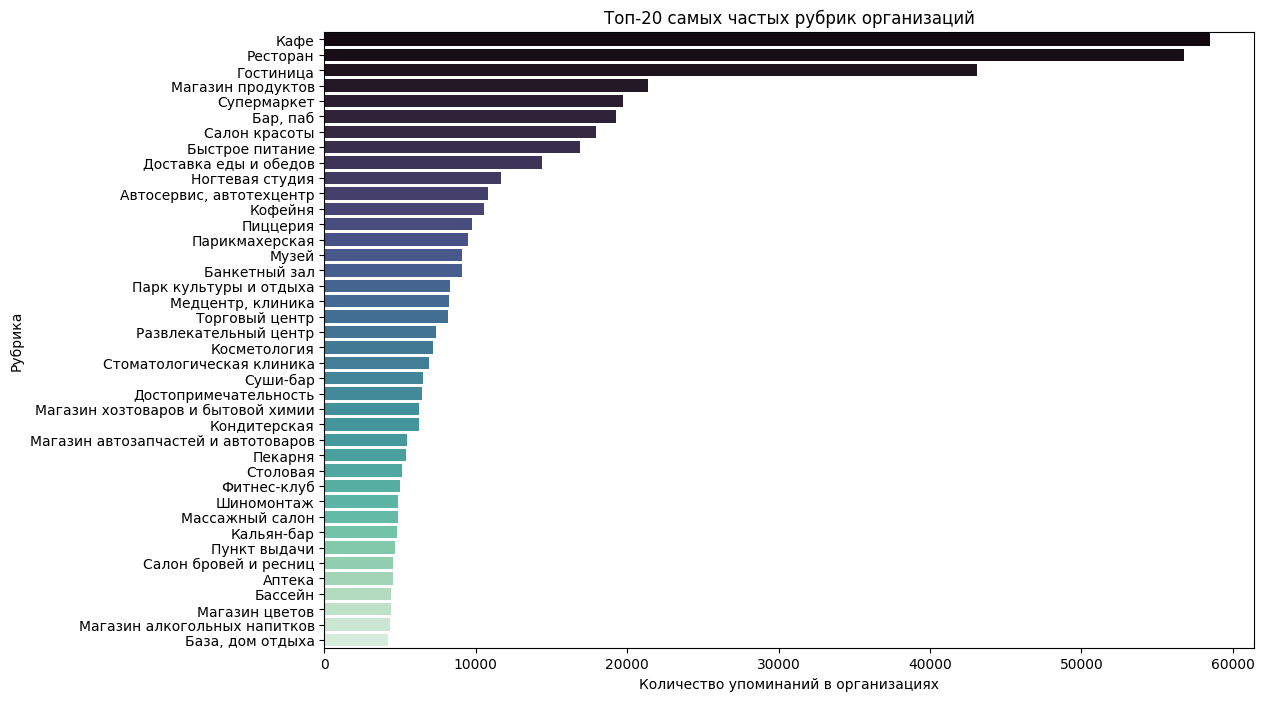

In [414]:
top_rubrics = exploded_rubrics['rubrics_list'].value_counts().nlargest(40)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_rubrics.index, x=top_rubrics.values, palette='mako',  hue=top_rubrics.index)
plt.title('–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Ä—É–±—Ä–∏–∫ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–ø–æ–º–∏–Ω–∞–Ω–∏–π –≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è—Ö')
plt.ylabel('–†—É–±—Ä–∏–∫–∞')
plt.show()

–ù–∞—à–∞ –±–∏–∑–Ω–µ—Å —Ü–µ–ª—å —Å–≤—è–∑–∞–Ω–∞ –∏–º–µ–Ω–Ω–æ —Å –µ–¥–∞–ª—å–Ω—ã–º–∏ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è–º–∏, –ø–æ—ç—Ç–æ–º—É –æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ —Ç–µ, —É –∫–æ—Ç–æ—Ä—ã—Ö –≤ —Ä—É–±—Ä–∏–∫–∞—Ö –µ—Å—Ç—å –ö–∞—Ñ–µ, –†–µ—Å—Ç–æ—Ä–∞–Ω, –ë–∞—Ä, –ø–∞–±, –ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ, –î–æ—Å—Ç–∞–≤–∫–∞ –µ–¥—ã –∏ –æ–±–µ–¥–æ–≤, –ö–æ—Ñ–µ–π–Ω—è, –ü–∏—Ü—Ü–µ—Ä–∏—è, –ë–∞–Ω–∫–µ—Ç–Ω—ã–π –∑–∞–ª, –°—É—à–∏-–±–∞—Ä, –ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è, –ü–µ–∫–∞—Ä–Ω—è, –°—Ç–æ–ª–æ–≤–∞—è, –ö–∞–ª—å—è–Ω-–±–∞—Ä

–ò —Å–∫–æ–ª—å–∫–æ –∏—Ö –≤–æ–æ–±—â–µ –º–æ–∂–µ—Ç –±—ã—Ç—å

In [415]:
exploded_rubrics['rubrics_list'].nunique()

1370

In [416]:
df.sample(20)

address  \
379180             –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ê–≤–∞–Ω–≥–∞—Ä–¥–Ω–∞—è —É–ª–∏—Ü–∞, 31   
214271       –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥, —É–ª–∏—Ü–∞ –ì–ª–µ–±–∞ –£—Å–ø–µ–Ω—Å–∫–æ–≥–æ, 16–ê   
9013          –†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö—Ä—ã–º, –°—É–¥–∞–∫, —É–ª–∏—Ü–∞ –°–∞–≤–µ–ª—å–µ–≤–∞, 10   
372145  –Ø—Ä–æ—Å–ª–∞–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ü–µ—Ä–µ—Å–ª–∞–≤–ª—å-–ó–∞–ª–µ—Å—Å–∫–∏–π, –ü–ª–µ...   
71382   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤—Å–∫–æ–π –§–µ—Ä–º...   
210943  –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å—Å–∫–∏–π –∫—Ä–∞–π, –ü—è—Ç–∏–≥–æ—Ä—Å–∫, –ø—Ä–æ—Å–ø–µ–∫—Ç 40 –ª–µ...   
305573  –ú—É—Ä–º–∞–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ú–æ–Ω—á–µ–≥–æ—Ä—Å–∫, –ø—Ä–æ—Å–ø–µ–∫—Ç –ö–∏—Ä–æ–≤...   
35302   –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ñ—É–∫–æ–≤—Å–∫–∏–π, —É–ª–∏—Ü–∞ –ù–∞—Ä–∫–æ–º–≤–æ–¥, 3   
235858                       –ú–æ—Å–∫–≤–∞, –ö–∞—à–∏—Ä—Å–∫–æ–µ —à–æ—Å—Å–µ, 61–ì   
425921              –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ù–∞—Ä–æ–¥–Ω–∞—è —É–ª–∏—Ü–∞, 42–∫2   
401406           –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, —É–ª–∏—Ü–∞ –ö–æ–ª–∏ –¢–æ–º—á–∞–∫–∞, 32–ë   
277849  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ù–æ–≤–æ—á–µ—Ä–∫–∞—Å—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 32, ...   
23159   –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É, –º–∏–∫—Ä–æ—Ä–∞–π–æ–Ω –†–∞–±–æ—á–∏–π –ì–æ—Ä–æ–¥–æ–∫, —É–ª...   
333195                 –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å, –ê–Ω—Ç–∏—á–Ω—ã–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 8–í   
297185               –ö–µ–º–µ—Ä–æ–≤–æ, –ë–∞–∑–æ–≤–∞—è —É–ª–∏—Ü–∞, 22, –∫–æ—Ä–ø. 1   
249050  –ö–∞–ª—É–∂—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ñ—É–∫–æ–≤—Å–∫–∏–π —Ä–∞–π–æ–Ω, –¥–µ—Ä–µ–≤–Ω—è –ì—Ä...   
390888  –Ø—Ä–æ—Å–ª–∞–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ü–µ—Ä–µ—Å–ª–∞–≤–ª—å-–ó–∞–ª–µ—Å—Å–∫–∏–π, —É–ª–∏...   
123595    –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ú—ã—Ç–∏—â–∏, —É–ª–∏—Ü–∞ –°–µ–ª–µ–∑–Ω—ë–≤–∞, 33   
296833  –†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–∞—Ä–µ–ª–∏—è, –ú–µ–¥–≤–µ–∂—å–µ–≥–æ—Ä—Å–∫–æ–µ –≥–æ—Ä–æ–¥—Å–∫–æ–µ ...   
171047              –ú–æ—Å–∫–≤–∞, —É–ª–∏—Ü–∞ –°—Ç—Ä–æ–∏—Ç–µ–ª–µ–π, 11, –∫–æ—Ä–ø. 1   

                                             name_ru  rating  \
379180                                   Street Food     1.0   
214271                     –ê–ù–û –¶–°–† –¢–µ—Ä—Ä–∏—Ç–æ—Ä–∏—è –°–ø–æ—Ä—Ç–∞     5.0   
9013                                       –ó–∏–º–∞ –õ–µ—Ç–æ     5.0   
372145                                     –§–ª–∞–π –£–ª–µ–π     5.0   
71382                                      –§–∞—Ä–∫–æ–ø.—Ä—É     5.0   
210943                           Chillout lounge bar     5.0   
305573                                         –ü—ã—à–∫–∞     5.0   
35302   –ú–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã–π –∞—ç—Ä–æ–ø–æ—Ä—Ç –ñ—É–∫–æ–≤—Å–∫–∏–π, —Ç–µ—Ä–º–∏–Ω–∞–ª –ê     3.0   
235858                                         –ó–∞–º–µ—Å     5.0   
425921                     –ù–æ—Ç–∞—Ä–∏—É—Å –í–æ—Å—Ç—Ä–µ—Ü–æ–≤–∞ –í. –õ.     5.0   
401406                            –ú–∞—Å—Ç–µ—Ä—Å–∫–∞—è –ê–±—Å–æ–ª—é—Ç     5.0   
277849                                      –õ–µ'–º—É—Ä—Ä—Ä     5.0   
23159                                    –¢–µ–ø–ª–æ—ç–Ω–µ—Ä–≥–æ     5.0   
333195                                     –ê—Ç–º–æ—Å—Ñ–µ—Ä–∞     5.0   
297185                                       –ë–∞—Ä—Ä–µ–ª—å     4.0   
249050                                 –Ø—Ö–æ–Ω—Ç—ã –¢–∞—Ä—É—Å–∞     5.0   
390888                          –°–µ–ª—å–¥—å —Ü–∞—Ä—Å–∫–∏–π –ø–æ—Å–æ–ª     4.0   
123595                              –ö–Ω–∏–∂–Ω—ã–π –õ–∞–±–∏—Ä–∏–Ω—Ç     1.0   
296833       –ü—É–ª–µ–º—ë—Ç–Ω–∞—è –¥–æ–ª–≥–æ–≤—Ä–µ–º–µ–Ω–Ω–∞—è –æ–≥–Ω–µ–≤–∞—è —Ç–æ—á–∫–∞     5.0   
171047                    –ö—É—É–ª–ö–ª–µ–≤–µ—Ä –ú—è—Å–Ω–æ–≤–™ –û—Ç–¥–æ—Ö–Ω–∏     3.0   

                                                  rubrics  \
379180                                    –ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ   
214271  –°–ø–æ—Ä—Ç–∏–≤–Ω—ã–π –∫–ª—É–±, —Å–µ–∫—Ü–∏—è;–°–ø–æ—Ä—Ç–∏–≤–Ω–æ–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ...   
9013                                            –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞   
372145                         –ö–∞—Ñ–µ;–†–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–π —Ü–µ–Ω—Ç—Ä   
71382   –ê–≤—Ç–æ–º–æ–±–∏–ª—å–Ω—ã–µ –ø—Ä–∏—Ü–µ–ø—ã;–ê–≤—Ç–æ–∞–∫—Å–µ—Å—Å—É–∞—

–û—á–µ–Ω—å –º–Ω–æ–≥–æ! –ù–æ –Ω–∞ —Å–µ–º–ø–ª–µ –≤–∏–¥–Ω–æ, —á—Ç–æ –ø–µ—Ä–≤–∞—è —Ä—É–±—Ä–∏–∫–∞ —Å–∫–æ—Ä–µ–µ —è–≤–ª—è–µ—Ç—Å—è –≥–ª–∞–≤–Ω–æ–µ –∏ –æ—Å–Ω–æ–≤–Ω–æ–π, —Ç–∞–∫ —á—Ç–æ –æ—Ç–¥–µ–ª–∏–º –µ–µ –∫–∞–∫ main

In [417]:
df_rubrics['main_rubric'] = df_rubrics['rubrics_list'].apply(lambda x: x[0])
df_rubrics.head()

address             name_ru  \
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   

   rating                                            rubrics  \
0     3.0                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   
1     5.0  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2     1.0                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3     4.0        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4     5.0  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   

                                                text  \
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...   
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...   
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...   
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...   
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...   

                                        rubrics_list  name_ru_normalized  \
0                                   [–ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å]  –º–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  [–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤, –ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫...     –ø—Ä–æ–¥—É–∫—Ç –µ—Ä–º–æ–ª–∏–Ω   
2                                      [–§–∏—Ç–Ω–µ—Å-–∫–ª—É–±]            –ª–∏–º–µ—Ñ–∏—Ç–∞   
3    [–ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞, –ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤, –°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥]        —Å–Ω–æw-–µx–ø—Ä–µ—Å—Å   
4  [–°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã, –í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã, –°–∞–ª–æ–Ω –±—Ä–æ...   —Å—Ç—É–¥–∏—è –±–µ–∞—É—Ç –±—Ä–æw   

         main_rubric  
0     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å  
1  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤  
2        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±  
3      –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞  
4      –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã

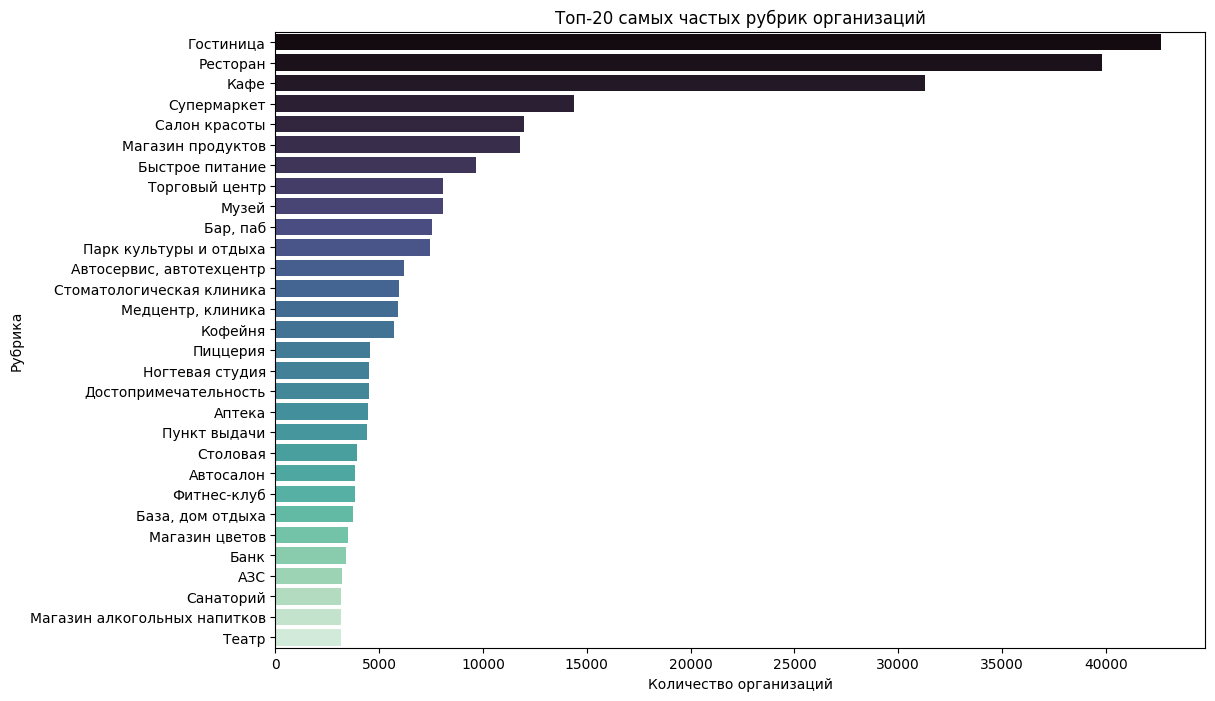

In [418]:
top_rubrics = df_rubrics['main_rubric'].value_counts().nlargest(30)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_rubrics.index, x=top_rubrics.values, palette='mako', hue=top_rubrics.index)
plt.title('–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Ä—É–±—Ä–∏–∫ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π')
plt.ylabel('–†—É–±—Ä–∏–∫–∞')
plt.show()

–¢–æ–ø –∏–∑–º–µ–Ω–∏–ª—Å—è. –û—Å—Ç–∞–≤–∏–º –¥–ª—è –æ—Å–Ω–æ–≤–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω–æ–µ –ø–æ–ª–µ, –≥–¥–µ –±—É–¥–µ—Ç –ª–∏—Å—Ç —Ä—É–±—Ä–∏–∫ –∏ –Ω–æ–≤–æ–µ –ø–æ–ª–µ —Å –≥–ª–∞–≤–Ω–æ–π —Ä—É–±—Ä–∏–∫–æ–π

In [419]:
df['main_rubric'] = df['rubrics_list'].apply(lambda x: x[0])
df.head()

address             name_ru  \
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   

   rating                                            rubrics  \
0     3.0                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   
1     5.0  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2     1.0                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3     4.0        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4     5.0  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   

                                                text  \
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...   
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...   
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...   
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...   
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...   

                                        rubrics_list  name_ru_normalized  \
0                                   [–ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å]  –º–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  [–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤, –ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫...     –ø—Ä–æ–¥—É–∫—Ç –µ—Ä–º–æ–ª–∏–Ω   
2                                      [–§–∏—Ç–Ω–µ—Å-–∫–ª—É–±]            –ª–∏–º–µ—Ñ–∏—Ç–∞   
3    [–ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞, –ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤, –°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥]        —Å–Ω–æw-–µx–ø—Ä–µ—Å—Å   
4  [–°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã, –í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã, –°–∞–ª–æ–Ω –±—Ä–æ...   —Å—Ç—É–¥–∏—è –±–µ–∞—É—Ç –±—Ä–æw   

         main_rubric  
0     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å  
1  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤  
2        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±  
3      –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞  
4      –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã

–ê —Ç–∞–∫–∂–µ –æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ —Ç–µ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏, –∫–æ–æ—Ç–æ—Ä—ã–µ —Å—á–∏—Ç–∞—é—Ç—Å—è –µ–¥–∞–ª—å–Ω—ã–º–∏

In [420]:
eda_orgs = ["–ö–∞—Ñ–µ", "–†–µ—Å—Ç–æ—Ä–∞–Ω", "–ë–∞—Ä, –ø–∞–±", "–ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ", "–î–æ—Å—Ç–∞–≤–∫–∞ –µ–¥—ã –∏ –æ–±–µ–¥–æ–≤", "–ö–æ—Ñ–µ–π–Ω—è", "–ü–∏—Ü—Ü–µ—Ä–∏—è", "–ë–∞–Ω–∫–µ—Ç–Ω—ã–π –∑–∞–ª", "–°—É—à–∏-–±–∞—Ä", "–ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è", "–ü–µ–∫–∞—Ä–Ω—è", "–°—Ç–æ–ª–æ–≤–∞—è", "–ö–∞–ª—å—è–Ω-–±–∞—Ä"]
search_pattern = '|'.join([re.escape(rubric) for rubric in eda_orgs])
mask = df['rubrics'].str.contains(search_pattern)
df_new = df[mask].copy()

In [421]:
df_new.shape

(122632, 8)

–û—Å—Ç–∞–ª–æ—Å—å 122 632 –æ—Ç–∑—ã–≤–æ–≤–æ

–ò —Ä–∞–¥–∏ –∏–Ω—Ç–µ—Ä–µ—Å–∞ –ø–æ—Å–º–æ—Ç—Ä–∏ –Ω–∞ –Ω–∞—à–∏ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π

In [422]:
print("–î–û –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏:")
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ {len(df_new.groupby('address'))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ + —Ä—É–±—Ä–∏–∫–∞ {len(df_new.groupby(['address', 'rubrics']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π {len(df_new.groupby(['address', 'rubrics', 'name_ru']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π {len(df_new.groupby(['name_ru']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å —Ä—É–±—Ä–∏–∫–æ–π {len(df_new.groupby(['name_ru', 'rubrics']))}')

print("\n–° –≥–ª–∞–≤–Ω–æ–π —Ä—É–±—Ä–∏–∫–æ–π:")
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ {len(df_new.groupby('address'))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ + —Ä—É–±—Ä–∏–∫–∞ {len(df_new.groupby(['address', 'main_rubric']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π {len(df_new.groupby(['address', 'main_rubric', 'name_ru_normalized']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π {len(df_new.groupby(['name_ru_normalized']))}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å —Ä—É–±—Ä–∏–∫–æ–π {len(df_new.groupby(['name_ru_normalized', 'main_rubric']))}')


–î–û –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏:
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ 43353
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ + —Ä—É–±—Ä–∏–∫–∞ 51843
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 52691
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 29314
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å —Ä—É–±—Ä–∏–∫–æ–π 39811

–° –≥–ª–∞–≤–Ω–æ–π —Ä—É–±—Ä–∏–∫–æ–π:
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ 43353
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≥–µ–æ—Ç–æ—á–µ–∫ + —Ä—É–±—Ä–∏–∫–∞ 49891
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 52651
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 27156
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π —Å —Ä—É–±—Ä–∏–∫–æ–π 32496


–ü–æ—Å–º–æ—Ç—Ä–∏–º, –≥–¥–µ –æ–¥–∏–Ω–Ω–∞–∫–æ–≤—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è, –Ω–æ —Ä–∞–∑–Ω—ã–µ —Ä—É–±—Ä–∏–∫–∏

In [423]:
multi_profile_orgs = df_new.groupby('name_ru_normalized')['rubrics'].nunique()
multi_profile_orgs = multi_profile_orgs[multi_profile_orgs > 1]
multi_profile_orgs = multi_profile_orgs.sort_values(ascending=False)
top_name = multi_profile_orgs.head(1).index

org_df = df_new[df_new['name_ru_normalized'] == top_name[0]]
print(top_name[0])
org_df['rubrics'].unique()

–±—É—Ö–∞–Ω–∫–∞


array(['–ö–∞—Ñ–µ;–ü–µ–∫–∞—Ä–Ω—è;–ö–æ—Ñ–µ–π–Ω—è', '–ü–µ–∫–∞—Ä–Ω—è', '–ü–µ–∫–∞—Ä–Ω—è;–ö–∞—Ñ–µ',
       '–ö–æ—Ñ–µ–π–Ω—è;–ü–µ–∫–∞—Ä–Ω—è;–ö–æ—Ñ–µ —Å —Å–æ–±–æ–π', '–ö–∞—Ñ–µ', '–ü–µ–∫–∞—Ä–Ω—è;–ö–∞—Ñ–µ;–ö–æ—Ñ–µ–π–Ω—è',
       '–ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è;–ü–µ–∫–∞—Ä–Ω—è;–ö–∞—Ñ–µ;–†–µ—Å—Ç–æ—Ä–∞–Ω', '–ö–∞—Ñ–µ;–ü–µ–∫–∞—Ä–Ω—è;–ö–æ—Ñ–µ —Å —Å–æ–±–æ–π',
       '–ü–µ–∫–∞—Ä–Ω—è;–ö–∞—Ñ–µ;–ö–æ—Ñ–µ —Å —Å–æ–±–æ–π', '–ö–∞—Ñ–µ;–ü–µ–∫–∞—Ä–Ω—è',
       '–ü–µ–∫–∞—Ä–Ω—è;–ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è;–ö–æ—Ñ–µ–π–Ω—è', '–ü–µ–∫–∞—Ä–Ω—è;–ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ;–ö–æ—Ñ–µ–π–Ω—è',
       '–ü–µ–∫–∞—Ä–Ω—è;–ö–∞—Ñ–µ;–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è',
       '–ü–µ–∫–∞—Ä–Ω—è;–ö–æ—Ñ–µ —Å —Å–æ–±–æ–π', '–ü–µ–∫–∞—Ä–Ω—è;–ö–æ—Ñ–µ–π–Ω—è',
       '–ü–µ–∫–∞—Ä–Ω—è;–ö–∞—Ñ–µ;–ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤', '–ü–µ–∫–∞—Ä–Ω—è;–ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è',
       '–ü–µ–∫–∞—Ä–Ω—è;–ö–æ—Ñ–µ–π–Ω—è;–ö–æ—Ñ–µ —Å —Å–æ–±–æ–π', '–ö–æ—Ñ–µ–π–Ω—è',
       '–ö–∞—Ñ–µ;–ü–µ–∫–∞—Ä–Ω—è;–ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è', '–ö–æ—Ñ–µ–π–Ω—è;–ü–µ–∫–∞—Ä

In [424]:
multi_profile_orgs = df_new.groupby(['name_ru_normalized', 'address'])['rubrics'].nunique()
multi_profile_orgs = multi_profile_orgs[multi_profile_orgs > 1]
multi_profile_orgs = multi_profile_orgs.sort_values(ascending=False)
top_name = multi_profile_orgs.head(1).index

org_df = df_new[df_new['name_ru_normalized'] == top_name[0][0]]
print(top_name[0])
org_df['rubrics'].unique()

('–º–æ—É—Å–∞ —Ö–æ—É—Å–∞', '–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, —É–ª–∏—Ü–∞ –ê–∫–∞–¥–µ–º–∏–∫–∞ –ü–∞–≤–ª–æ–≤–∞, 5')


array(['–†–µ—Å—Ç–æ—Ä–∞–Ω;–†–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–π —Ü–µ–Ω—Ç—Ä',
       '–†–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–π —Ü–µ–Ω—Ç—Ä;–†–µ—Å—Ç–æ—Ä–∞–Ω;–î–µ—Ç—Å–∫–∞—è –ø–ª–æ—â–∞–¥–∫–∞', '–†–µ—Å—Ç–æ—Ä–∞–Ω'],
      dtype=object)

–ò—Ç–æ–≥–æ –∏–º–µ–Ω–Ω–æ –¥–ª—è –µ–¥–∞–ª–µ–Ω –Ω–µ —Å—Ç–æ–∏—Ç –±—Ä–∞—Ç—å –≥–ª–∞–≤–Ω—É—é —Ä—É–±—Ä–∏–∫—É, –Ω–æ –¥–ª—è —Å–µ—Ç–µ–π –ø–æ-–¥—Ä—É–≥–æ–º—É –Ω–∏–∫–∞–∫ –Ω–µ —É–±–µ—Ä–µ—à—å —É—Å–ª–æ–≤–∏–µ —Å —Ç–µ–º, —á—Ç–æ –¥–≤–µ —Ä–∞–∑–Ω—ã—Ö –æ—Ä–≥–∏ –º–æ–≥—É—Ç –∏–º–µ—Ç—å –∞–±—Å–æ–ª—é—Ç–Ω–æ –æ–¥–∏–Ω–Ω–∞–∫–æ–≤—ã–µ –æ—Ä–≥–∏

### –†–µ–π—Ç–∏–Ω–≥

In [425]:
df_new['rating'].describe()

count    122632.000000
mean          4.420559
std           1.183983
min           0.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

–í–∏–¥–∏–º, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –æ—Ü–µ–Ω–æ–∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∞ –∏ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ —Å—Ç–æ–∏—Ç —É—á–µ—Å—Ç—å –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤

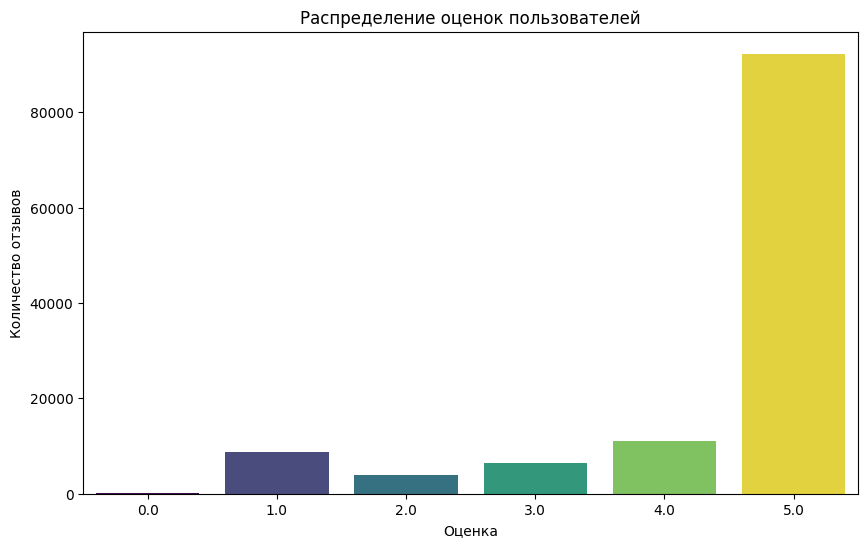

In [426]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_new, palette='viridis', hue='rating', legend=False)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ü–µ–Ω–æ–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π')
plt.xlabel('–û—Ü–µ–Ω–∫–∞')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤')
plt.show()

### –ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã

–ò—Ç–æ–≥–æ, —Ä–µ—à–∞–µ–º —Ç–∞–∫, —á—Ç–æ:
* –û—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è (organization_id): –ö–æ–Ω–∫—Ä–µ—Ç–Ω—ã–π —Ñ–∏–∑–∏—á–µ—Å–∫–∏–π —Ñ–∏–ª–∏–∞–ª. –ï–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω–æ—Å—Ç—å –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –º–µ—Å—Ç–æ–º, –Ω–∞–∑–≤–∞–Ω–∏–µ–º –∏ —Ç–∏–ø–æ–º –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏. - —Ç–∏–ø –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å, —Ç–∞–∫ –∫–∞–∫ –¥–≤–µ –µ–¥–∞–ª—å–Ω—ã–µ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ —Å –æ–¥–∏–Ω–Ω–∞–∫–æ–≤—ã–º –Ω–∞–∑–≤–∞–Ω–∏–µ–º –≤ –æ–¥–Ω–æ–º –¥–æ–º–µ –∑–≤—É—á–∏—Ç —Å—Ç—Ä–∞–Ω–Ω–æ. –†–∞–Ω—å—à–µ –º—ã —Ä–µ—à–∞–ª–∏ –ø—Ä–æ–±–ª–µ–º—É –º–Ω–æ–≥–æ–ø—Ä–æ—Ñ–∏–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π
* –°–µ—Ç—å (chain_id): –ë—Ä–µ–Ω–¥ –∏–ª–∏ –±–∏–∑–Ω–µ—Å-–Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ. –£–Ω–∏–∫–∞–ª—å–Ω–æ—Å—Ç—å –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –Ω–∞–∑–≤–∞–Ω–∏–µ–º –∏ —Ç–∏–ø–æ–º –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –≤–Ω–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏—è.

–ì–¥–µ —Ç–∏–ø –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –±—É–¥–µ–º –±—Ä–∞—Ç—å –∫–∞–∫ –≥–ª–∞–≤–Ω—É—é —Ä—É–±—Ä–∏–∫—É

In [429]:
df_new['organization_id'] = df_new['address'] + '|' + df_new['name_ru_normalized']
df_new['chain_id'] = df_new['main_rubric'] + '|' + df_new['name_ru_normalized']

df_new['organization_id'] = pd.factorize(df_new['organization_id'])[0]
df_new['chain_id'] = pd.factorize(df_new['chain_id'])[0]

num_orgs = df_new['organization_id'].nunique()
num_chains = df_new['chain_id'].nunique()

print(f"\n–ò—Ç–æ–≥:")
print(f"–°–æ–∑–¥–∞–Ω–æ {num_orgs} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π (—Ñ–∏–ª–∏–∞–ª–æ–≤)")
print(f"–°–æ–∑–¥–∞–Ω–æ {num_chains} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤ —Å–µ—Ç–µ–π (–±—Ä–µ–Ω–¥–æ–≤/–±–∏–∑–Ω–µ—Å-–Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–π)")


–ò—Ç–æ–≥:
–°–æ–∑–¥–∞–Ω–æ 52598 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π (—Ñ–∏–ª–∏–∞–ª–æ–≤)
–°–æ–∑–¥–∞–Ω–æ 32496 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤ —Å–µ—Ç–µ–π (–±—Ä–µ–Ω–¥–æ–≤/–±–∏–∑–Ω–µ—Å-–Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–π)


In [431]:
df_new.head()

address  name_ru  rating  \
6   –í–æ—Ä–æ–Ω–µ–∂—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ë–æ–≥—É—á–∞—Ä—Å–∫–∏–π —Ä–∞–π–æ–Ω, –ú-4 –î–æ...   –£ —Ç–µ—â–∏     4.0   
8               –ú–æ—Å–∫–≤–∞, 4-–π –ö–æ–∂–µ–≤–Ω–∏—á–µ—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, 4    Jinju     5.0   
9               –ú–æ—Å–∫–≤–∞, 4-–π –ö–æ–∂–µ–≤–Ω–∏—á–µ—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, 4    Jinju     4.0   
12                     –ö–µ–º–µ—Ä–æ–≤–æ, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω–∏–Ω–∞, 59–ê  –ü—Ä–æ–≤–∞–Ω—Å     5.0   
13  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥ –°–æ—á–∏, –ø–æ—Å—ë...   –ü–∞–Ω–¥–æ–∫     2.0   

         rubrics                                               text  \
6           –ö–∞—Ñ–µ  –ì–ª—É–±–∏–Ω–∫–∞ —Å—Ç—Ä–∞–Ω—ã –≤–æ –≤—Å–µ—Ö —Å–≤–æ–∏—Ö –ø—Ä–æ—è–≤–ª–µ–Ω–∏—è—Ö. –ê—Å—Å...   
8   –ö–∞—Ñ–µ;–ö–æ—Ñ–µ–π–Ω—è  5 –∏–∑ 5üñ§ –ü–∏–ª –∫–æ—Ñ–µ –∏ –≤ –†–∏–º–µ, –∏ –≤  –ü–∞—Ä–∏–∂–µ, –Ω–æ –≤–∫—É...   
9   –ö–∞—Ñ–µ;–ö–æ—Ñ–µ–π–Ω—è  –ù–µ –æ—á–µ–Ω—å —É–¥–æ–±–Ω–æ–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ, –æ—Ç –º–µ—Ç—Ä–æ –∏–¥—Ç–∏ –º...   
12  –ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è  –í–∫—É—Å–Ω–æ–µ –º–µ—Å—Ç–æ –≤ —Ü–µ–Ω—Ç—Ä–µ –≥–æ—Ä–æ–¥–∞.  –†–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω–æ–µ ...   
13      –†–µ—Å—Ç–æ—Ä–∞–Ω  –°–∞–º—ã–π –±–æ–ª—å—à–æ–π –ø–ª—é—Å —ç—Ç–æ –º–µ—Å—Ç–æ—Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ, –Ω–∞–±–µ...   

       rubrics_list name_ru_normalized   main_rubric  organization_id  \
6            [–ö–∞—Ñ–µ]             —É —Ç–µ—â–∞          –ö–∞—Ñ–µ                0   
8   [–ö–∞—Ñ–µ, –ö–æ—Ñ–µ–π–Ω—è]               –π–∏–Ω—è          –ö–∞—Ñ–µ                1   
9   [–ö–∞—Ñ–µ, –ö–æ—Ñ–µ–π–Ω—è]               –π–∏–Ω—è          –ö–∞—Ñ–µ                1   
12   [–ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è]            –ø—Ä–æ–≤–∞–Ω—Å  –ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è                2   
13       [–†–µ—Å—Ç–æ—Ä–∞–Ω]             –ø–∞–Ω–¥–æ–∫      –†–µ—Å—Ç–æ—Ä–∞–Ω                3   

    chain_id  
6          0  
8          1  
9          1  
12         2  
13         3

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–∞–º—ã–µ –∫—Ä—É–ø–Ω—ã–µ —Å–µ—Ç–∏ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ñ–∏–ª–∏–∞–ª–æ–≤

In [434]:
df_new['chain_size'] = df_new.groupby('chain_id')['organization_id'].transform('nunique')
top_chains_df = df_new[['chain_id', 'name_ru', 'name_ru_normalized', 'main_rubric', 'chain_size']].drop_duplicates(subset=['chain_id'])

top_chains_df.sort_values(by='chain_size', ascending=False).head(10)

chain_id                 name_ru   name_ru_normalized      main_rubric  \
636         100        –í–∫—É—Å–Ω–æ ‚Äî –∏ —Ç–æ—á–∫–∞       –≤–∫—É—Å–Ω–æ –∏ —Ç–æ—á–∫–∞  –ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ   
799         116                     KFC                  –∫—Ñ—Ü  –ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ   
320          49              –î–æ–¥–æ –ü–∏—Ü—Ü–∞          –¥–æ–¥—ã–π –ø–∏—Ü—Ü–∞         –ü–∏—Ü—Ü–µ—Ä–∏—è   
1334        167                –°—Ç–æ–ª–æ–≤–∞—è             —Å—Ç–æ–ª–æ–≤–∞—è         –°—Ç–æ–ª–æ–≤–∞—è   
661         103             –ë—É—Ä–≥–µ—Ä –ö–∏–Ω–≥          –±—É—Ä–≥–µ—Ä –∫–∏–Ω–≥  –ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ   
529          84                    –ö–∞—Ñ–µ                 –∫–∞—Ñ–µ             –ö–∞—Ñ–µ   
8919        646  –í–∫—É—Å–Ω–æ ‚Äî –∏ —Ç–æ—á–∫–∞. –ê–≤—Ç–æ  –≤–∫—É—Å–Ω–æ –∏ —Ç–æ—á–∫–∞ –∞–≤—Ç–æ  –ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ   
846         121                  –®–∞—É—Ä–º–∞               —à–∞—É—Ä–º–∞  –ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ   
11556       884             –ú—è—Ç–∞ Lounge          –º—è—Ç—ã–π –ª–æ—É–Ω–≥       –ö–∞–ª—å—è–Ω-–±–∞—Ä   
4081        317             –®–æ–∫–æ–ª–∞–¥–Ω–∏—Ü–∞          —à–æ–∫–æ–ª–∞–¥–Ω–∏—Ü–∞          –ö–æ—Ñ–µ–π–Ω—è   

       chain_size  
636           541  
799           443  
320           384  
1334          356  
661           346  
529           205  
8919          165  
846           153  
11556         128  
4081          123

–¢–µ–ø–µ—Ä—å –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –ø–æ–ª—Å–µ–¥—É—é—â–µ–≥–æ –µ—â–µ –¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ —Å–µ—Ç–∏ –∏ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏, –ø–æ–∫–∞ –Ω–µ –±—É–¥–µ–º —É–¥–∞–ª—è—Ç—å —Ç–µ, –≥–¥–µ –≤—Å–µ–≥–æ 1 —à—Ç—É–∫–∞, –≤–¥—Ä—É–≥ –ø—Ä–∏–≥–æ–¥—è—Ç—Å—è, –ø—Ä–æ—Å—Ç–æ –ø–æ–º–µ—Ç–∏–º –∏—Ö

In [435]:
df_new['reviews_per_organization'] = df_new.groupby('organization_id')['rating'].transform('count')
df_new['reviews_per_chain'] = df_new.groupby('chain_id')['rating'].transform('count')
df_new.head()

address  name_ru  rating  \
6   –í–æ—Ä–æ–Ω–µ–∂—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ë–æ–≥—É—á–∞—Ä—Å–∫–∏–π —Ä–∞–π–æ–Ω, –ú-4 –î–æ...   –£ —Ç–µ—â–∏     4.0   
8               –ú–æ—Å–∫–≤–∞, 4-–π –ö–æ–∂–µ–≤–Ω–∏—á–µ—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, 4    Jinju     5.0   
9               –ú–æ—Å–∫–≤–∞, 4-–π –ö–æ–∂–µ–≤–Ω–∏—á–µ—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, 4    Jinju     4.0   
12                     –ö–µ–º–µ—Ä–æ–≤–æ, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω–∏–Ω–∞, 59–ê  –ü—Ä–æ–≤–∞–Ω—Å     5.0   
13  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥ –°–æ—á–∏, –ø–æ—Å—ë...   –ü–∞–Ω–¥–æ–∫     2.0   

         rubrics                                               text  \
6           –ö–∞—Ñ–µ  –ì–ª—É–±–∏–Ω–∫–∞ —Å—Ç—Ä–∞–Ω—ã –≤–æ –≤—Å–µ—Ö —Å–≤–æ–∏—Ö –ø—Ä–æ—è–≤–ª–µ–Ω–∏—è—Ö. –ê—Å—Å...   
8   –ö–∞—Ñ–µ;–ö–æ—Ñ–µ–π–Ω—è  5 –∏–∑ 5üñ§ –ü–∏–ª –∫–æ—Ñ–µ –∏ –≤ –†–∏–º–µ, –∏ –≤  –ü–∞—Ä–∏–∂–µ, –Ω–æ –≤–∫—É...   
9   –ö–∞—Ñ–µ;–ö–æ—Ñ–µ–π–Ω—è  –ù–µ –æ—á–µ–Ω—å —É–¥–æ–±–Ω–æ–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ, –æ—Ç –º–µ—Ç—Ä–æ –∏–¥—Ç–∏ –º...   
12  –ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è  –í–∫—É—Å–Ω–æ–µ –º–µ—Å—Ç–æ –≤ —Ü–µ–Ω—Ç—Ä–µ –≥–æ—Ä–æ–¥–∞.  –†–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω–æ–µ ...   
13      –†–µ—Å—Ç–æ—Ä–∞–Ω  –°–∞–º—ã–π –±–æ–ª—å—à–æ–π –ø–ª—é—Å —ç—Ç–æ –º–µ—Å—Ç–æ—Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ, –Ω–∞–±–µ...   

       rubrics_list name_ru_normalized   main_rubric  organization_id  \
6            [–ö–∞—Ñ–µ]             —É —Ç–µ—â–∞          –ö–∞—Ñ–µ                0   
8   [–ö–∞—Ñ–µ, –ö–æ—Ñ–µ–π–Ω—è]               –π–∏–Ω—è          –ö–∞—Ñ–µ                1   
9   [–ö–∞—Ñ–µ, –ö–æ—Ñ–µ–π–Ω—è]               –π–∏–Ω—è          –ö–∞—Ñ–µ                1   
12   [–ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è]            –ø—Ä–æ–≤–∞–Ω—Å  –ö–æ–Ω–¥–∏—Ç–µ—Ä—Å–∫–∞—è                2   
13       [–†–µ—Å—Ç–æ—Ä–∞–Ω]             –ø–∞–Ω–¥–æ–∫      –†–µ—Å—Ç–æ—Ä–∞–Ω                3   

    chain_id  chain_size  reviews_per_organization  reviews_per_chain  
6          0           1                         1                  1  
8          1           1                         2                  2  
9          1           1                         2                  2  
12         2           1                         1                  1  
13         3           1                         2                  2

In [436]:
single_review_orgs_count = df_new[df_new['reviews_per_organization'] == 1]['organization_id'].nunique()
total_orgs_count = df_new['organization_id'].nunique()
percentage_orgs = (single_review_orgs_count / total_orgs_count) * 100

print(f"–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤: {total_orgs_count}")
print(f"–ò–∑ –Ω–∏—Ö —Å 1 –æ—Ç–∑—ã–≤–æ–º: {single_review_orgs_count}")
print(f"–î–æ–ª—è —Ñ–∏–ª–∏–∞–ª–æ–≤ —Å 1 –æ—Ç–∑—ã–≤–æ–º: {percentage_orgs:.2f}%")

–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤: 52598
–ò–∑ –Ω–∏—Ö —Å 1 –æ—Ç–∑—ã–≤–æ–º: 29885
–î–æ–ª—è —Ñ–∏–ª–∏–∞–ª–æ–≤ —Å 1 –æ—Ç–∑—ã–≤–æ–º: 56.82%


In [443]:
single_review_chains_count = df_new[df_new['reviews_per_chain'] == 1]['chain_id'].nunique()
total_chains_count = df_new['chain_id'].nunique()
percentage_chains = (single_review_chains_count / total_chains_count) * 100

print(f"\n–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–µ—Ç–µ–π: {total_chains_count}")
print(f"–ò–∑ –Ω–∏—Ö —Å 1 –æ—Ç–∑—ã–≤–æ–º: {single_review_chains_count}")
print(f"–î–æ–ª—è —Å–µ—Ç–µ–π —Å 1 –æ—Ç–∑—ã–≤–æ–º: {percentage_chains:.2f}%")


–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–µ—Ç–µ–π: 32496
–ò–∑ –Ω–∏—Ö —Å 1 –æ—Ç–∑—ã–≤–æ–º: 15555
–î–æ–ª—è —Å–µ—Ç–µ–π —Å 1 –æ—Ç–∑—ã–≤–æ–º: 47.87%


–¢–∞–∫ –∫–∞–∫ –º–∞–ª–æ –æ—Ç–∑—ã–≤–æ–≤ –Ω–∞ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—é –æ—á–µ–Ω—å –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ - –º–Ω–µ–Ω–∏–µ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–∏–ª—å–Ω–æ —Å–º–µ—â–µ–Ω–æ –∏ –æ—Ü–µ–Ω–∫–∞ –Ω–µ–æ–±—ä–µ–∫—Ç–∏–≤–Ω–∞, —Ç–æ –º—ã —Ä–µ—à–∏–ª–∏ –æ—Å—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ —Ç–µ –æ—Ç–∑—ã–≤—ã –∏ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏, –≥–¥–µ reviews_per_organization > 4

In [444]:
len(df_new[df_new['reviews_per_organization'] > 2])

72451

In [445]:
len(df_new[df_new['reviews_per_organization'] > 4])

48866

–†–µ—à–∞–µ–º –æ—Å—Ç–∞–≤–ª—è—Ç—å –æ—Ä–≥–∏, –≥–¥–µ —Ö–æ—Ç—è –±—ã 3 –æ—Ç–∑—ã–≤–∞ –µ—Å—Ç—å

In [446]:
df_more_2 = df_new[df_new['reviews_per_organization'] > 2].copy()

In [447]:
single_review_orgs_count = df_more_2[df_more_2['reviews_per_organization'] == 1]['organization_id'].nunique()
total_orgs_count = df_more_2['organization_id'].nunique()
percentage_orgs = (single_review_orgs_count / total_orgs_count) * 100

print(f"–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤: {total_orgs_count}")
print(f"–ò–∑ –Ω–∏—Ö —Å 1 –æ—Ç–∑—ã–≤–æ–º: {single_review_orgs_count}")
print(f"–î–æ–ª—è —Ñ–∏–ª–∏–∞–ª–æ–≤ —Å 1 –æ—Ç–∑—ã–≤–æ–º: {percentage_orgs:.2f}%")

–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ñ–∏–ª–∏–∞–ª–æ–≤: 12565
–ò–∑ –Ω–∏—Ö —Å 1 –æ—Ç–∑—ã–≤–æ–º: 0
–î–æ–ª—è —Ñ–∏–ª–∏–∞–ª–æ–≤ —Å 1 –æ—Ç–∑—ã–≤–æ–º: 0.00%


–ò—Ç–æ–≥–æ –æ—Å—Ç–∞–µ—Ç—Å—è 12,5–∫ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π 

In [448]:
df_more_2.to_csv('dataset.csv')